# Assignment : Lending Club Case Study

## Project Description

This assignment will give us an idea about how real business problems are solved or can reduce the error in every business  using EDA. In this case study, We will understand how quality data is used to minimise the risk of losing money while sanctioning loan to customers.

## Business Understanding

This case study is for Lending club which is a finance company which specialises in lending various types of loans to various customers.

When the company receives a loan application or some one apply for loan, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 

1. If the applicant have potential to repay the loan, then not approving the loan results in a loss of business to the company 


2. If the applicant dont have potential to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about loan applicants and whether they ‘defaulted’ or not. The main goal is to analyse whether a person is likely to default, By which we can take actions such as denying the loan, reducing the amount of loan, loan at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. 

In [2]:
###import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
####Loading the loan data
loan_data=pd.read_csv('loan.csv')

In [4]:
loan_data.shape

(39717, 111)

In [5]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning Process

### Befor Starting any Data analysis we need to follow below Data Cleaning Process, which is required for any data analysis.

    1. Fixing rows and column
    2. Null Values/Missing Values
    3. Standardizing values
        a. Standardise units
        b. Remove Outliers
    4. invalid Values
    5. filtering data
    6. Visualizing Data

##### As we have seen data set hase no any header and footer comment. so we dont need to do fixing row and column

### Lets find "Null values" in loan data set

In [6]:
loan_data.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### We found there are a lots of columns with "all null values". Let's first remove those columns

In [7]:
loan_data.dropna(axis=1,how='all',inplace=True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Let us see if there are any columns with "unique or single" values in them.

In [8]:
get_unique_columns=loan_data.nunique()
print(get_unique_columns)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

##### we can see  few columns with single values, these column will not effect in our analysis.
    

In [9]:
#### Storing unique or single value columns to new data frame to drop these column.
store_unique_columns=get_unique_columns[get_unique_columns.values==1]
store_unique_columns.index


Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

##### Lets drop these single or unique value columns  as they will not use for our analysis

In [10]:
loan_data.drop(columns=list(store_unique_columns.index),inplace=True)
loan_data.shape

(39717, 48)

#### There are some column which are not significant for loan data analysis lets remove them.

In [11]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","desc","title","emp_title","funded_amnt",
            "delinq_2yrs","revol_bal","mths_since_last_record","addr_state",
           "next_pymnt_d","pub_rec_bankruptcies","mths_since_last_delinq"]
loan_data.drop(del_cols,axis = 1,inplace=True)
loan_data.shape


(39717, 21)

In [12]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

#### There are three Loan status "Fully Paid","Current","Charged Off"  as we know that "Current" Loan Status is not giving any info for our analysis for approving or rejecting application, so we can drop this from data set.

In [13]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### After removing Null values & insignificant columns, we are again checking for missing values.

In [14]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

#### We can see columns "emp_length" & "revol_util" has  missing values .
  
    To handle missing values of emp_length and revol_util
    Let's check the data type of each columns.

In [15]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

#### We can see above missing values of emp_length and revol_util is very less, so we can replace missing values in these two columns by 0. So replacing missing values by 0 of these two columns will not much effect our analysys.

In [16]:
loan_data.emp_length.fillna(0)
loan_data.emp_length.isna().sum()

1033

In [17]:
loan_data.revol_util.fillna(0)
loan_data.revol_util.isna().sum()

50

##### Now We have Clean All the Unwanted data,missing values,insignificant columns & null values columns

In [18]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


##  Standardising Values

### Standardise units
    1. "int_rate" described as an object column, it has continous values. 
    2. "revol_util" described as an object column, it has continous values.
    3. "emp_length" contains < 1 year 10+ years we assume < as 0 and +  10 to make continous values.

In [19]:
loan_data.int_rate=pd.to_numeric(loan_data.int_rate.str[:-1])

In [20]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.str[:-1])

In [21]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in str(x) else (x.split('+')[0] if "+" in str(x) else (x.split('years')[0] if ("years") in str(x) else(x.split('year')[0] if ("year") in str(x) else x)))))


In [22]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


    we can see we have sub_grade column with alphanumeric value
    Let's extract only numeric values from sub_grade, this will help in our analysis

In [23]:
loan_data.sub_grade=pd.to_numeric(loan_data.sub_grade.apply(lambda x:x[-1]))

In [24]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,2,10.0,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,4,0.0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,5,10.0,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,1,10.0,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,4,3.0,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


###  Outliers Process
#### Let's find out outliers on numerical variables which could possibly have outliers.

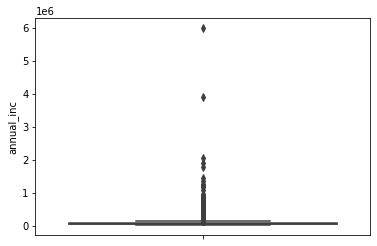

In [25]:
#### annual_inc has numeric values, Let's find out outliers
sns.boxplot(y=loan_data['annual_inc'])
plt.show()

#### We can see there are outliers, 
    -We will remove outliers.
    -because this would disproportionately affect the results of your data analysis
    -we will calculates the quantile of the values in a given axis to remove outliers
    -The quantile() method calculates the quantile column-wise and returns the mean value for each row

In [26]:
annual_inc_quantile_info = loan_data.annual_inc.quantile([0.5, 0.70,0.80,0.90, 0.95, 0.97,0.98, 0.99])
annual_inc_quantile_info

0.50     58868.0
0.70     75000.0
0.80     90000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

1. The values after 95 percentile seems to be high increase in the value.<br>
2. So, considering threshold for removing outliers as 0.95

In [27]:
annual_inc_95_per = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= annual_inc_95_per]

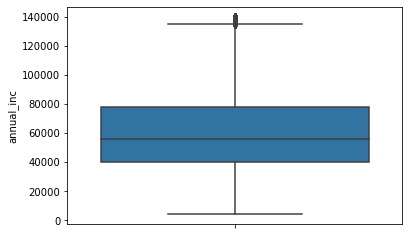

In [28]:
sns.boxplot(y=loan_data['annual_inc'])
plt.show()

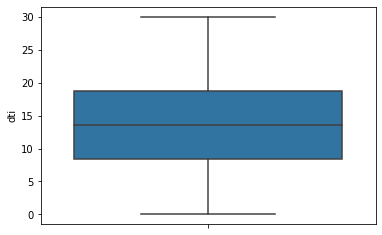

In [29]:
#### dti has numeric values, Let's find out outliers
sns.boxplot(y=loan_data.dti)
plt.show()

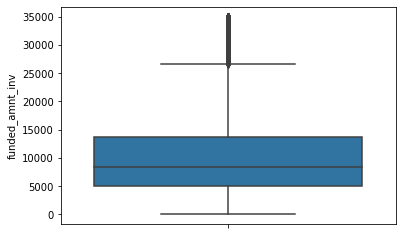

In [30]:
#### funded_amnt_inv has numeric values, Let's find out outliers
sns.boxplot(y=loan_data.funded_amnt_inv)
plt.show()

Clearly we can see above there are some values far from distribution for funded_amnt_inv, but these values are continous and there is no need to remove outliers.

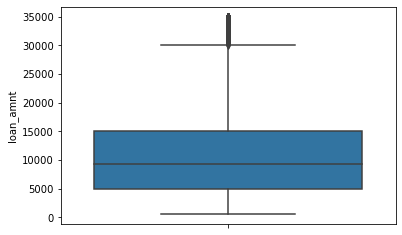

In [31]:
#### loan_data has numeric values, Let's find out outliers
sns.boxplot(y=loan_data.loan_amnt)
plt.show()

Clearly we can see above there are some values far from distribution for loan_amnt, but these values are continous and there is no need to remove outliers.

## Visualizing The Data

1. Now we have clean the data and will analyze and visualize the data.
2. The company wants to know which loan applications are risky or defaulter

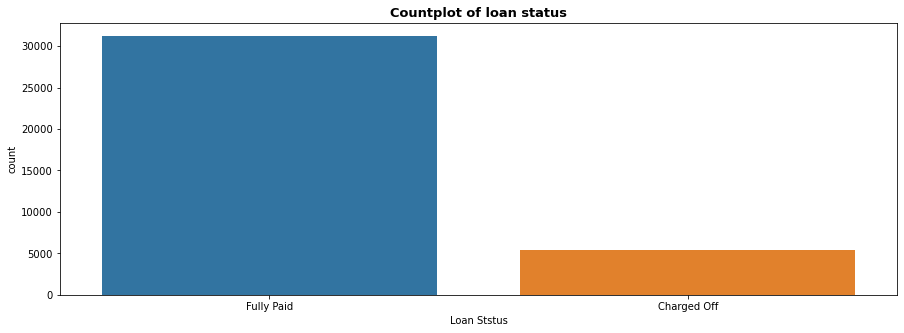

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='loan_status',data=loan_data)
plt.title('Countplot of loan status',weight='bold').set_fontsize('13')
plt.xlabel('Loan Ststus')
plt.show()

##### For finding loan defaulters, we will Analyse/Visualize data only for 'Charged Off' loan_status on various subset of data.

#### Univariate Analysis

 ##### 1. Analyzing by Loan Purpose

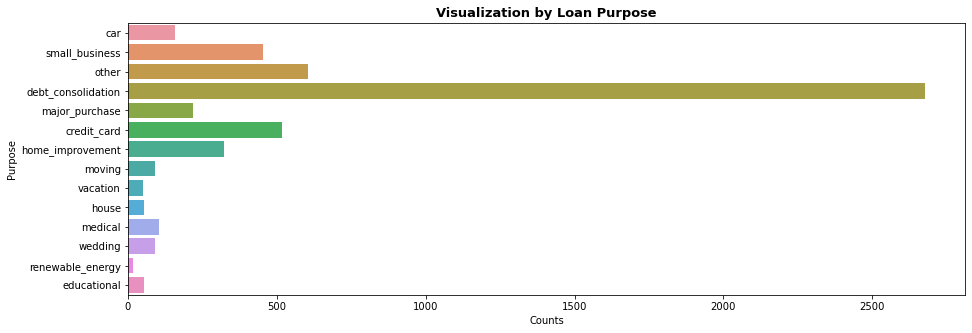

In [33]:
### Analyzing by Loan Purpose
plt.figure(figsize=(15,5))
sns.countplot(y='purpose',data=loan_data[loan_data.loan_status=='Charged Off'])
plt.title('Visualization by Loan Purpose',weight='bold').set_fontsize('13')
plt.ylabel('Purpose')
plt.xlabel('Counts')
plt.show()

#### Observation

* There is a 'More' probability of defaulting the loan if applicant is taken loan for debt consolidation purpose.

##### 2 Analyzing by Grade

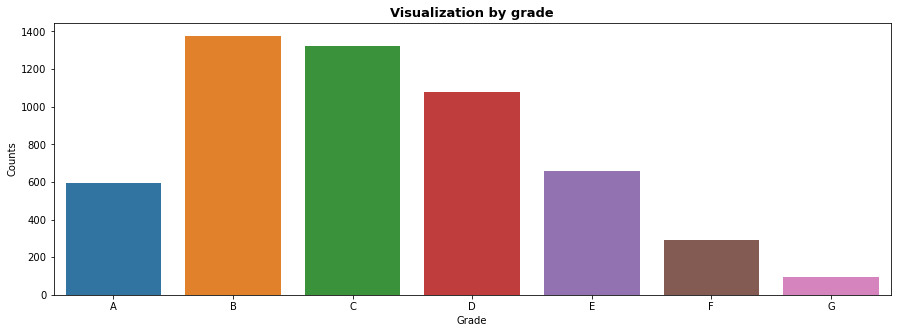

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Visualization by grade',weight='bold').set_fontsize('13')
plt.xlabel('Grade')
plt.ylabel('Counts')
plt.show()

#### Observation

* There is a 'More' probability of defaulting the loan if applicant is belong to 'Group B'


#### 3 Analyzing by Grade and Subgrade

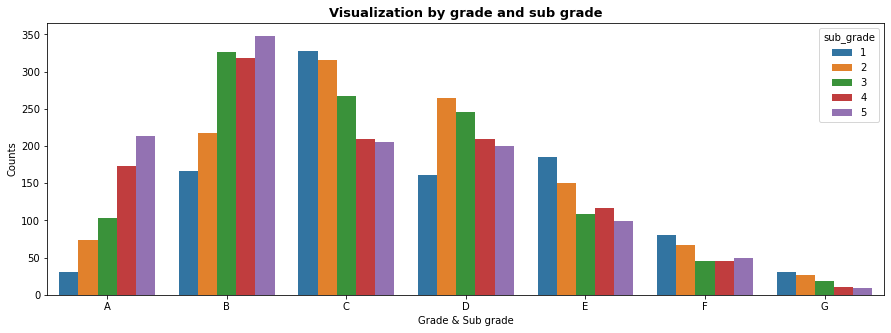

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])
plt.title('Visualization by grade and sub grade',weight='bold').set_fontsize('13')
plt.xlabel('Grade & Sub grade')
plt.ylabel('Counts')
plt.show()

#### Observation

* There is a "More' probability of defaulting the loan if applicant is belong to 'Grade B' with 'Sub Grade 5'


#### 4 Analyzing home_ownership

In [36]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [37]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

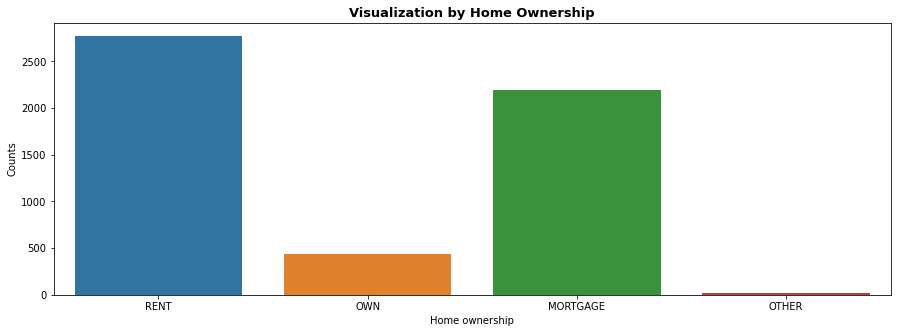

In [38]:
### Analyzing by Home Ownership
plt.figure(figsize=(15,5))
sns.countplot(x='home_ownership',data=loan_data[loan_data.loan_status=='Charged Off'])
plt.title('Visualization by Home Ownership',weight='bold').set_fontsize('13')
plt.xlabel('Home ownership')
plt.ylabel('Counts')
plt.show()

#### Observation 

* Applicant having home ownership is 'Rent' There is a 'More' probability of defaulting loan. 


#### 4 Analyzing  Emp Length

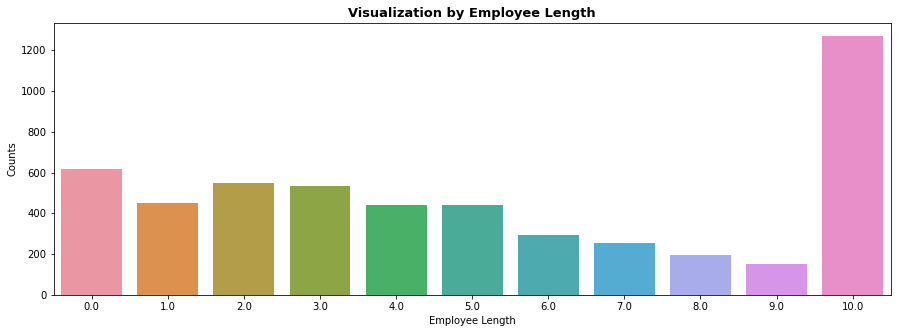

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=loan_data[loan_data.loan_status=='Charged Off'],)
plt.title('Visualization by Employee Length',weight='bold').set_fontsize('13')
plt.xlabel('Employee Length')
plt.ylabel('Counts')
plt.show()

#### Observation

* Applicants with employment length of 10 is more probability of defaulting.

#### 5. Analyzing Loan Term

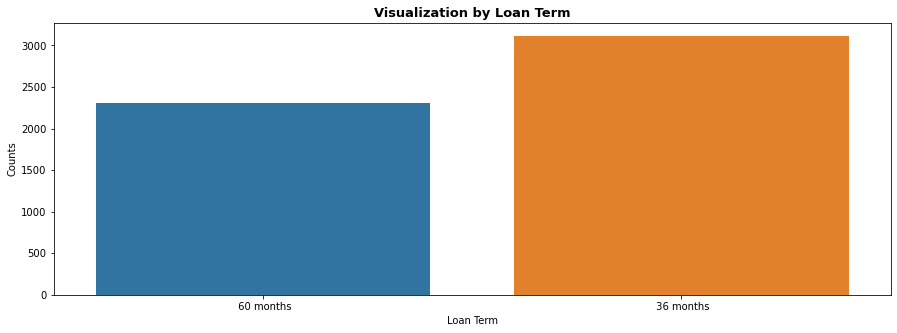

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x='term', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Visualization by Loan Term',weight='bold').set_fontsize('13')
plt.xlabel('Loan Term')
plt.ylabel('Counts')
plt.show()

#### Observation

* Applicants with Loan term of 36 months is more probability of defaulting.

#### 6. Analyzing Verification Status

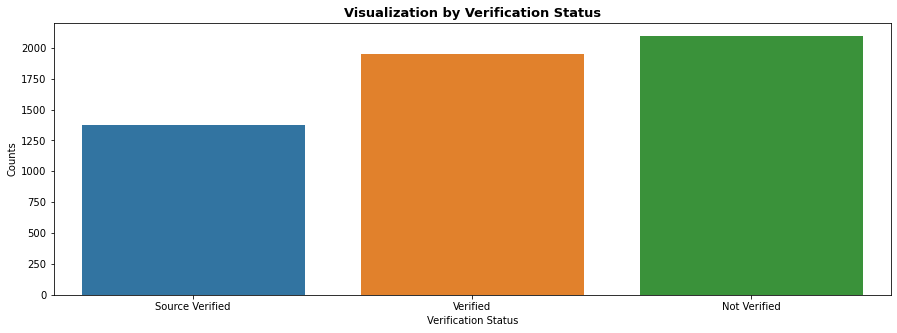

In [41]:

plt.figure(figsize=(15,5))
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Visualization by Verification Status',weight='bold').set_fontsize('13')
plt.xlabel('Verification Status')
plt.ylabel('Counts')
plt.show()

#### Observation

* There is a 'More' probability of defaulting When the loan status is Not verified

#### Analyzing inq_last_6mths

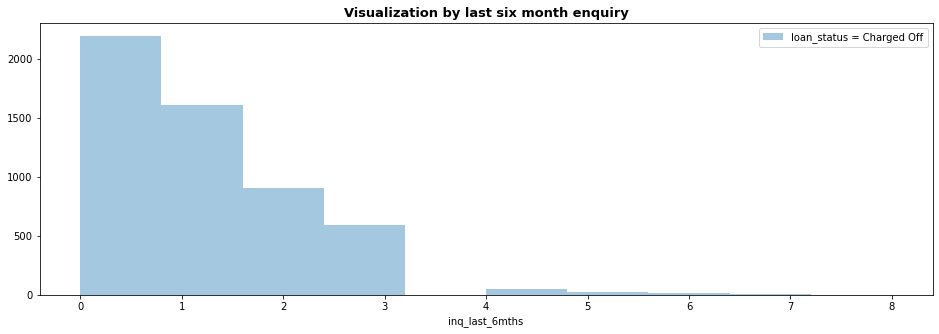

In [42]:
plt.figure(figsize=(16,5))
plt.title('Visualization by last six month enquiry',weight='bold').set_fontsize('13')

plt.hist(loan_data[loan_data.loan_status=='Charged Off']['inq_last_6mths'],label='loan_status = Charged Off', alpha=0.4)
plt.xlabel('inq_last_6mths')
plt.legend()
plt.show()


#### Observation

* There is a 'More' probability of defaulting When the no of enquiries in last 6 months is 0. 

#### 7 Analyzing by issued month and year
    * We need to create new column for month and year.

In [43]:
### Spliting  "month" & 'year' from issue_d.
extract_month_year=loan_data.issue_d.str.split('-')

### Creating new column "month" from issue_d in datasheet.
loan_data['issue_month']=extract_month_year.str[0]

### Creating new column "year" from issue_d in datasheet.
loan_data['issue_year']='20'+extract_month_year.str[1]

loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10.0,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0.0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10.0,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10.0,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3.0,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


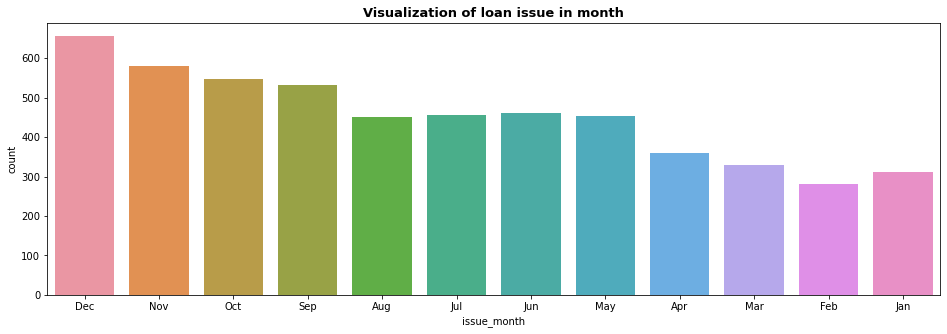

In [44]:
##### Vizualization By month
plt.figure(figsize=(16,5))
plt.title('Visualization of loan issue in month',weight='bold').set_fontsize('13')
sns.countplot(x='issue_month',data=loan_data[loan_data.loan_status=='Charged Off'])
plt.show()

#### Observation

* Maximum number of defaults occured when the loan was sanctioned/issued in Dec.

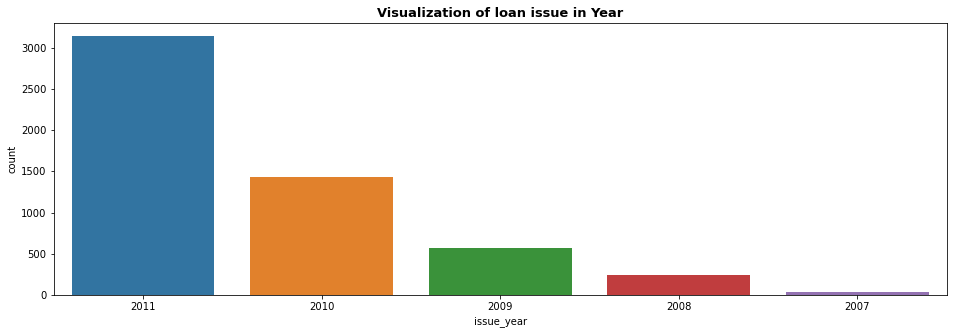

In [45]:
##### Analyzing by Year
plt.figure(figsize=(16,5))
plt.title('Visualization of loan issue in Year',weight='bold').set_fontsize('13')
sns.countplot(x='issue_year',data=loan_data[loan_data.loan_status=='Charged Off'])
plt.show()

#### Observation

* Maximum number of defaults occured when the loan was sanctioned/issued in 2011.

###### 8 Analyzing by installment

In [46]:
######creating group of instalment
loan_data['installment_group']=pd.cut(loan_data.installment,bins=11,precision=0,labels=['10-125','125-250','225-350','350-475','475-600','600-725','725-900','900-1025','1025-1150','1150-1275','1275-1375'])
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year,installment_group
0,5000,4975.0,36 months,10.65,162.87,B,2,10.0,RENT,24000.0,...,27.65,Jan-85,1,3,0,83.7,9,Dec,2011,125-250
1,2500,2500.0,60 months,15.27,59.83,C,4,0.0,RENT,30000.0,...,1.00,Apr-99,5,3,0,9.4,4,Dec,2011,10-125
2,2400,2400.0,36 months,15.96,84.33,C,5,10.0,RENT,12252.0,...,8.72,Nov-01,2,2,0,98.5,10,Dec,2011,10-125
3,10000,10000.0,36 months,13.49,339.31,C,1,10.0,RENT,49200.0,...,20.00,Feb-96,1,10,0,21.0,37,Dec,2011,225-350
5,5000,5000.0,36 months,7.90,156.46,A,4,3.0,RENT,36000.0,...,11.20,Nov-04,3,9,0,28.3,12,Dec,2011,125-250


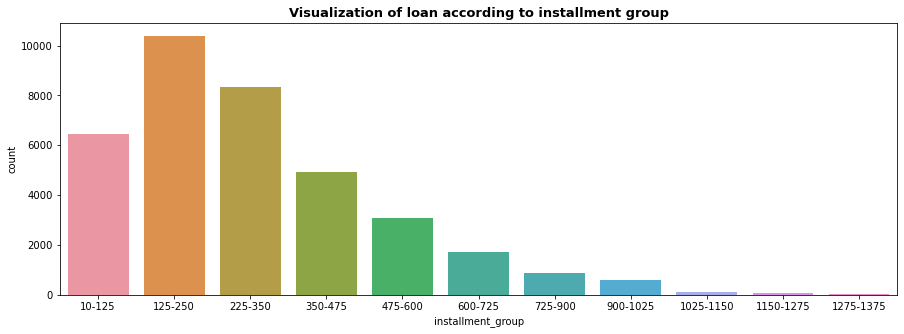

In [47]:
#####Visualyzing installment by ploting bins
plt.figure(figsize=(15,5))
sns.countplot(x=loan_data.installment_group,data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Visualization of loan according to installment group',weight='bold').set_fontsize('13')
plt.show()

#### Observation

* Maximum number of defaults occurred When monthly installments are between 145-274

##### 9 Analyzing by loan amount

In [48]:
######creating group of loan_amt
loan_data['loan_amt_group']=pd.cut(loan_data.loan_amnt,bins=7,precision=0,labels=['0-3000','3000-6000','6000-9000','9000-1200','12000-15000','15000-18000','18000-21000'])
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year,installment_group,loan_amt_group
0,5000,4975.0,36 months,10.65,162.87,B,2,10.0,RENT,24000.0,...,Jan-85,1,3,0,83.7,9,Dec,2011,125-250,0-3000
1,2500,2500.0,60 months,15.27,59.83,C,4,0.0,RENT,30000.0,...,Apr-99,5,3,0,9.4,4,Dec,2011,10-125,0-3000
2,2400,2400.0,36 months,15.96,84.33,C,5,10.0,RENT,12252.0,...,Nov-01,2,2,0,98.5,10,Dec,2011,10-125,0-3000
3,10000,10000.0,36 months,13.49,339.31,C,1,10.0,RENT,49200.0,...,Feb-96,1,10,0,21.0,37,Dec,2011,225-350,3000-6000
5,5000,5000.0,36 months,7.90,156.46,A,4,3.0,RENT,36000.0,...,Nov-04,3,9,0,28.3,12,Dec,2011,125-250,0-3000


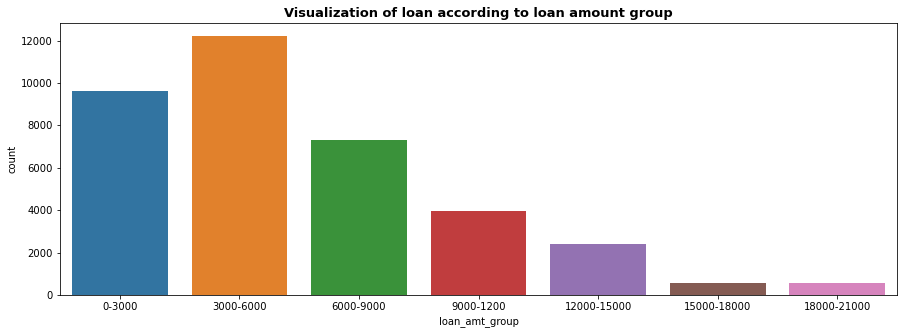

In [49]:
#####Analyzing by loan amount by ploting bins
plt.figure(figsize=(15,5))
plt.title('Visualization of loan according to loan amount group',weight='bold').set_fontsize('13')
sns.countplot(x=loan_data.loan_amt_group,data=loan_data.loan_status=='Charged Off')
plt.show()

#### Observation

* Maximum number of defaults occured when Loan amount is between 3000 - 6000

##### 9 Analyzing by funded_amnt_inv_group

In [50]:
#### Creating Group for funded_amnt_inv 
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','35k-40k'])
                                                                                        

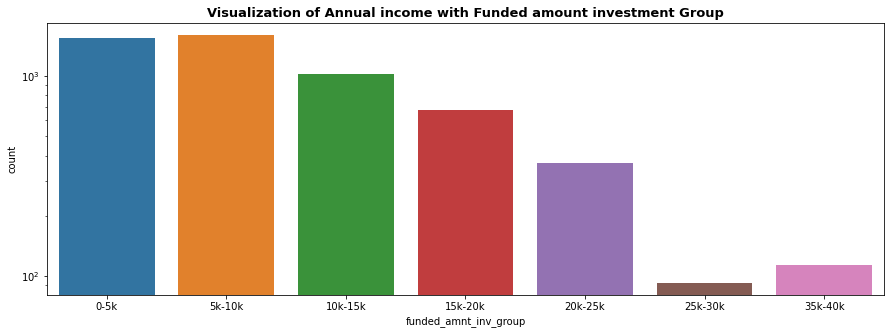

In [68]:
fig,ax = plt.subplots(figsize = (15,5))
ax.set_yscale('log')
plt.title('Visualization of Annual income with Funded amount investment Group',weight='bold').set_fontsize('13')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#### Observation

* Maximum number of defaults occured When funded amount by investor is between 5000-10000

##### 9 Analyzing by Dti

In [52]:
#### Creating Group for dti 
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-5','5-11','11-17','17-23','23-30'])

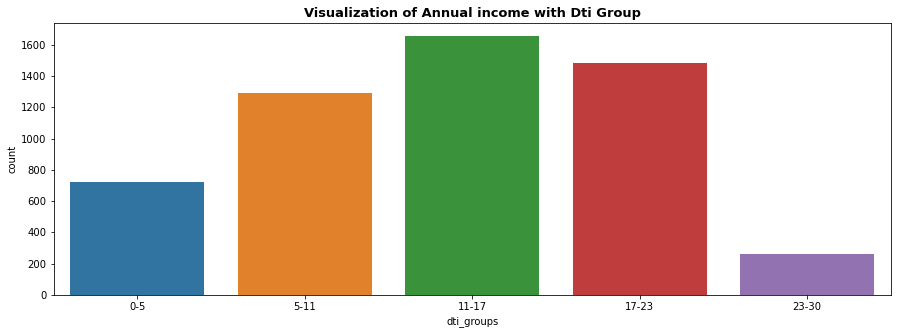

In [67]:
#### analyzing dti 
plt.figure(figsize=(15,5))
plt.title('Visualization of Annual income with dti Group',weight='bold').set_fontsize('13')
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#### Observation

* Maximum number of defaults occured When Dti is between 11-17

### Bivariate Analysis

#### Analyzing Annual income With Other variables

##### 1. Analyzing Annual income vs loan purpose

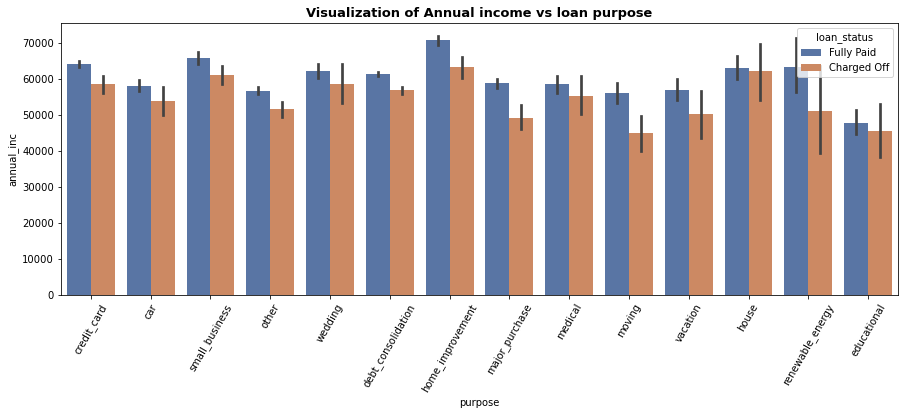

In [70]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=60)
plt.title('Visualization of Annual income vs loan purpose',weight='bold').set_fontsize('13')
sns.barplot(data =loan_data,x='purpose', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

#### Observation

1. Applicatnt more than 60k annual income applied for 'Home improvement' & 'House' loan.
2. The ratio of loan defaulter is highest with annual income>50K and who applied for 'Home improvement','House','credit card','small business', 'wedding' and 'debt consolidation'.

##### 2. Analyzing Annual income vs int_rate

In [55]:
##### Creating new column int_rate_groups of int_rate
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5-9','9-13','13-17','17-21','21-24'])
loan_data.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,issue_month,issue_year,installment_group,loan_amt_group,funded_amnt_inv_group,dti_groups,int_rate_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10.0,RENT,24000.0,...,0,83.7,9,Dec,2011,125-250,0-3000,0-5k,23-30,9-13
1,2500,2500.0,60 months,15.27,59.83,C,4,0.0,RENT,30000.0,...,0,9.4,4,Dec,2011,10-125,0-3000,0-5k,0-5,13-17
2,2400,2400.0,36 months,15.96,84.33,C,5,10.0,RENT,12252.0,...,0,98.5,10,Dec,2011,10-125,0-3000,0-5k,5-11,13-17
3,10000,10000.0,36 months,13.49,339.31,C,1,10.0,RENT,49200.0,...,0,21.0,37,Dec,2011,225-350,3000-6000,5k-10k,17-23,13-17
5,5000,5000.0,36 months,7.90,156.46,A,4,3.0,RENT,36000.0,...,0,28.3,12,Dec,2011,125-250,0-3000,0-5k,5-11,5-9


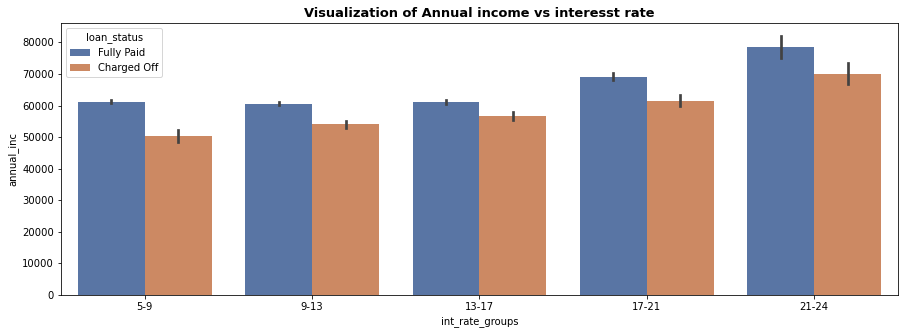

In [71]:
plt.figure(figsize=(15,5))
plt.title('Visualization of Annual income vs interesst rate',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data,x='int_rate_groups',y='annual_inc',hue='loan_status',palette='deep')
plt.show()

#### Observation

1. Applicants who have higher income paying high interest rate.
2. The ratio of defaulting the loan is higher for applicants who have high income with higher interest rate. 

##### 3. Analyzing Annual income vs term

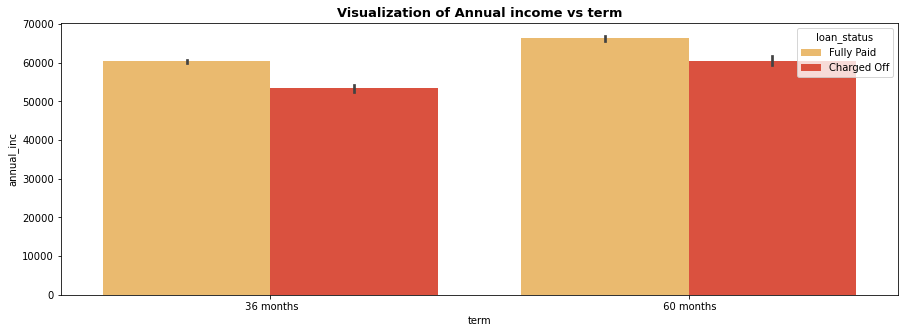

In [72]:
plt.figure(figsize=(15,5))
plt.title('Visualization of Annual income vs term',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data,y='annual_inc',x='term', hue='loan_status',palette='YlOrRd')
plt.show()

#### Observation

1. Applicants with high annual income taken loan for maximum no of month(Long term).
2. Ratio of defaulting the loan is higher in long term loan as compared to short term loan and who's annual income is high also. 

##### 4. Analyzing annual income vs Home ownership

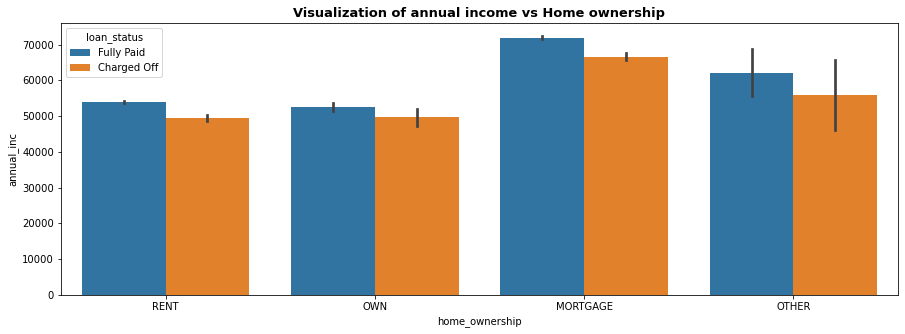

In [73]:
plt.figure(figsize=(15,5))
plt.title('Visualization of annual income vs Home ownership',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data, x='home_ownership',y='annual_inc',hue='loan_status')
plt.show()

#### Observation

1. Applicants whose home ownership is 'MORTGAGE and have income of 60-70k

##### 5. Analyzing annual income vs loan amount

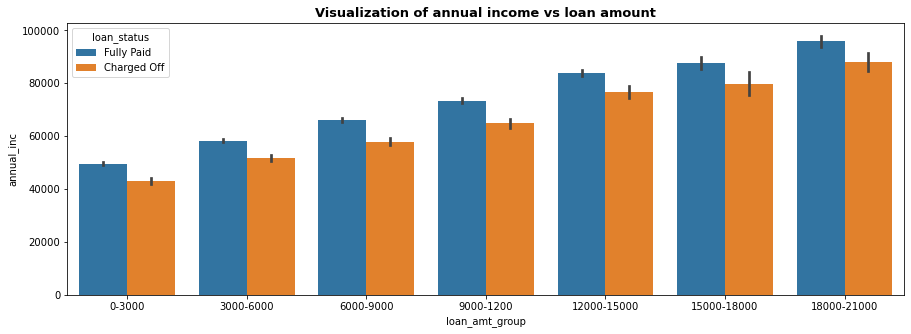

In [74]:
plt.figure(figsize=(15,5))
plt.title('Visualization of annual income vs loan amount',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data,x='loan_amt_group',y='annual_inc',hue='loan_status')
plt.show()

#### Observation 

1. We can clearly see higher the annual income higher the loan is sanctioned.
2. Maximum loan amount with higher annual income, the defaulting ratio is higher.

#### Analyzing Loan amount with other variable

##### 6.Analyzing Loan amount vs Grade

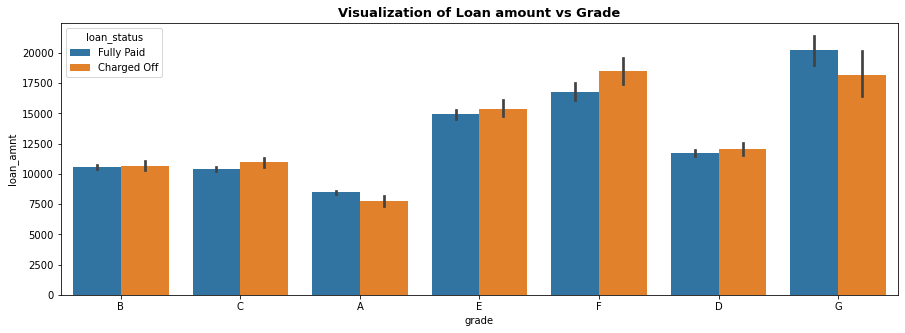

In [75]:
plt.figure(figsize=(15,5))
plt.title('Visualization of Loan amount vs Grade',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data,y='loan_amnt',x='grade',hue='loan_status')
plt.show()

#### Observation

1. Applicants with Grade 'G' have take maximum loan amount.
2. Applicants with Grade 'G' have 'fully paid' loan amount is more than 'charged off'.
3. Applicants with grade 'F' have more 'Charged off' loan compared to grade 'G'.

##### 7.Analyzing Loan amount vs purpose

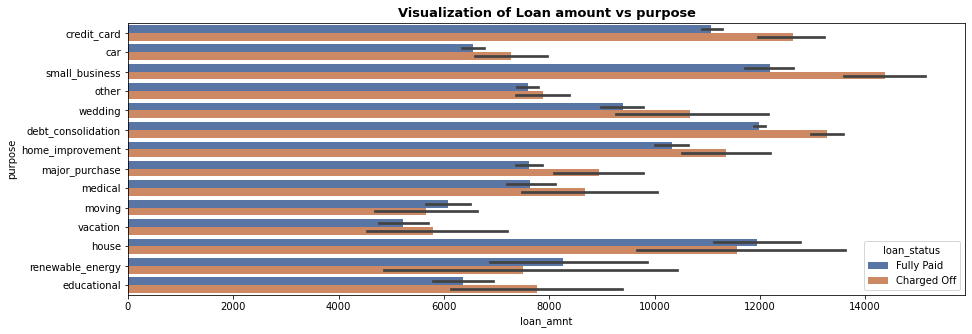

In [76]:
plt.figure(figsize=(15,5))
plt.title('Visualization of Loan amount vs purpose',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data,x='loan_amnt',y='purpose',hue='loan_status',palette='deep')
plt.show()

#### Observation

1. We can see Maximum loan is taken for 'Small Business' purpose.
2. There are more probability of defaulting whose taken loan for 'small business' purpose.
3. defaulting ratio is highest of 'small business' this may be due to 'shutdown' of business.

##### 8.Analyzing Loan amount vs Home ownership

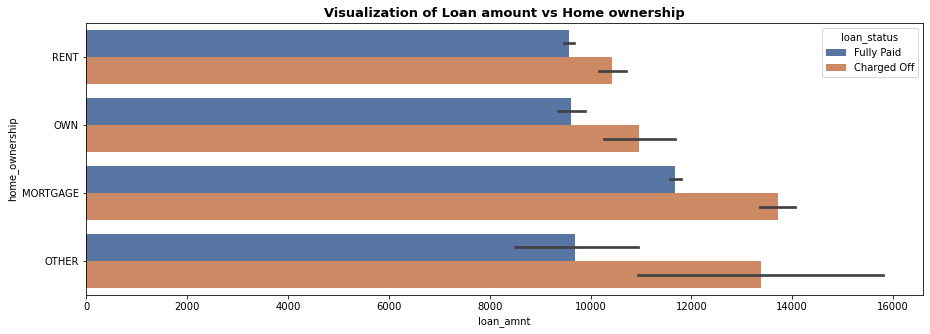

In [77]:
plt.figure(figsize=(15,5))
plt.title('Visualization of Loan amount vs Home ownership',weight='bold').set_fontsize('13')
sns.barplot(data=loan_data,x='loan_amnt',y='home_ownership',hue='loan_status',palette='deep')
plt.show()

#### Observation

1. Applicants whose home ownership is 'MORTGAGE' have taken maximum amount as compared to other.
2. Applicants whose home ownership is 'MORTGAGE' have highest defaulting ratio.
3. Applicants whose home ownership is 'MORTGAGE' have paid maximum loan amounts as compared to other.

##### 9.Analyzing Loan amount vs month and year

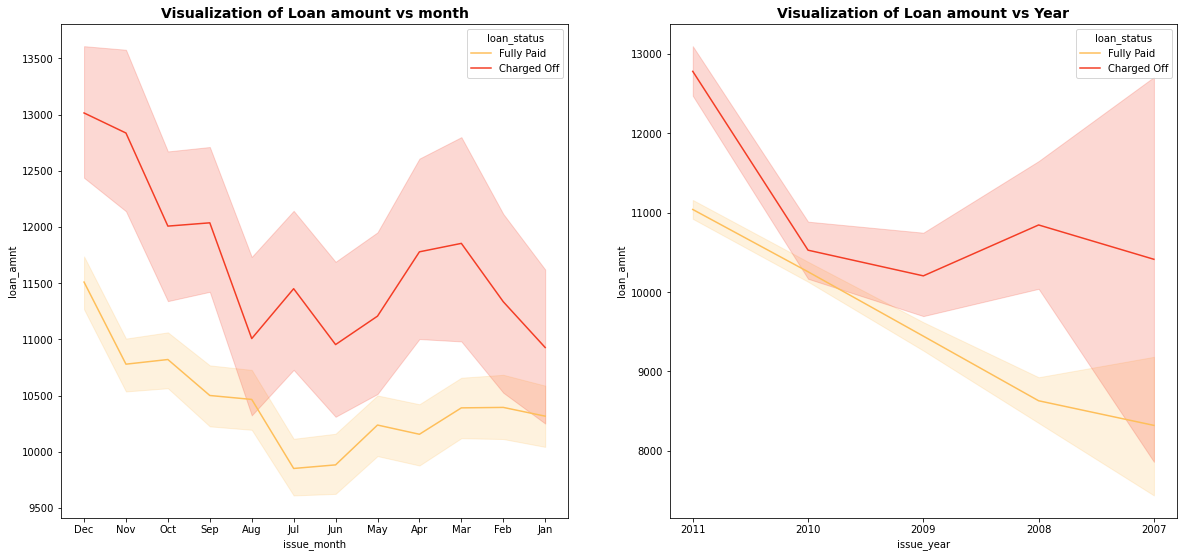

In [78]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title('Visualization of Loan amount vs month',weight='bold').set_fontsize('14')
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="YlOrRd")
plt.subplot(222)
plt.title('Visualization of Loan amount vs Year',weight='bold').set_fontsize('14')
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="YlOrRd")
plt.show()

### Observation

1. Maximum number "charged off" loan was sanctioned/issued in December as compared to other month. 
2. Loan issued is maximum in the year 2011 as compared to other years.
3. "Charged off amount is also maximum in the year 2011 as compared to other years. 
4. we can see December is the month which has the highest number of loan applications per year and also have the highest default ratio. May be people take loan for Christmas party and then they are not able to pay the amount.
5. We can clearly see maximum no of defaulter in year '2011', this may be due to 'RECESSION' and job loss.

##### 10. Loan amount vs employee service

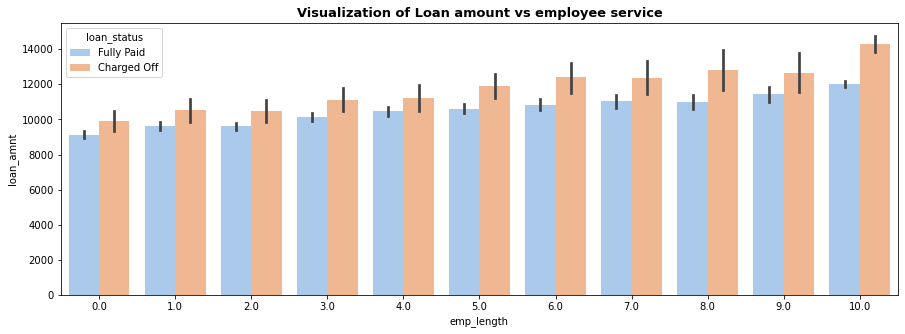

In [64]:
plt.figure(figsize=(15,5))
plt.title('Visualization of Loan amount vs employee service',weight='bold').set_fontsize('13')
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.show()

#### Observation

1. Applicants with longer employment length have applied for higher loan amount
2. Applicants of all employee length group have more probability to get defaulter as compared to 'fully paid' applicants


##### 11. Loan amount  group vs interest rate

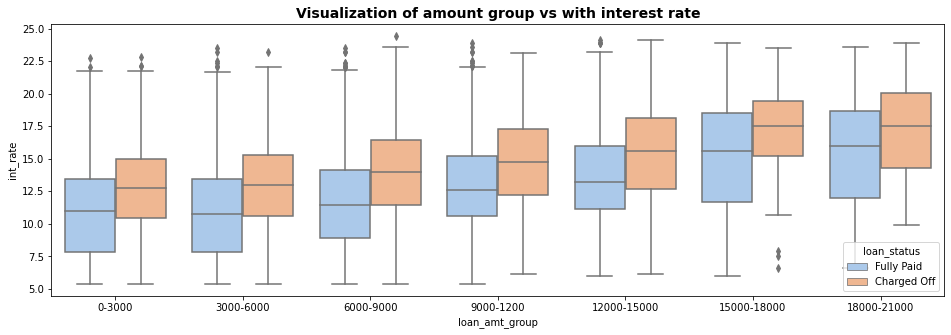

In [65]:
plt.figure(figsize=(16,5))
plt.title('Visualization of amount group vs with interest rate',weight='bold').set_fontsize('14')
sns.boxplot(data =loan_data,y ='int_rate', x ='loan_amt_group', hue ='loan_status',palette="pastel")
plt.show()

#### Observation

1. The interest rate for charged off loans is high than that of fully paid loans in all the loan_amount groups.
2. This can be a strong factor for loan defaulting